## Observations and Insights 

Observations:
1 - The data for the four most successful regimens ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin') is very reliable. Out of 100 records across all four regimens there was only 1 outlier.
2 - Capomulin & Ramicane were much more effective at abating tumor volume growth compared to Infubinol & Ceftamin. If you look at the box & whisper plots of the final tumor volume by drug regimen you will see that all the major measurements are much higher for the Infubinol & Ceftamin than they are for Capomulin & Ramicane.
3 - Average tumor volume & weight are strongly correlated according the the final scatter plot. The linear regression module shows that as the weight of a mouse increases, so does the likelihood of having more tumors by volume.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df= pd.concat({'Mean': Mean, 'Median': Median, 'Variance': Variance, 'Std Deviation': std_dev, 'SEM': sem},axis=1)
summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

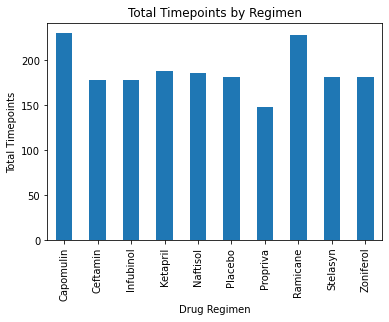

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
regimens = cleaned_df.groupby('Drug Regimen')['Drug Regimen']
total_timepoints = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
df = pd.DataFrame({'Regimens': regimens, 'Total Timepoints': total_timepoints})
pandas_bar_chart = df.plot.bar(title='Total Timepoints by Regimen', ylabel='Total Timepoints', legend=False)

Text(0.5, 1.0, 'Total Timepoints by Regimen')

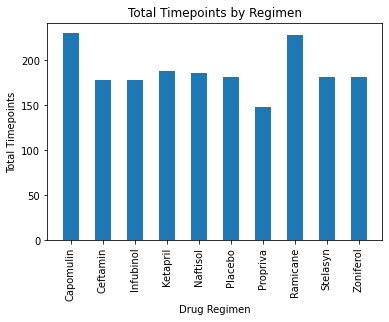

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimens = sorted(cleaned_df['Drug Regimen'].unique())
total_timepoints = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
x_axis = np.arange(len(total_timepoints))
plt.bar(x_axis, total_timepoints, width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Total Timepoints by Regimen')

<AxesSubplot:title={'center':'Sex of Mice by %'}>

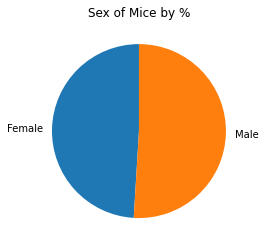

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = cleaned_df.groupby('Sex')['Sex'].count()
sex_df.plot.pie(title='Sex of Mice by %', startangle=90, ylabel='')

Text(0.5, 1.0, 'Sex of Mice by %')

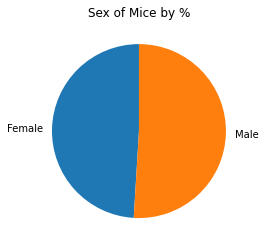

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = cleaned_df.groupby('Sex')['Sex'].count()
labels = sex_df.index
plt.pie(sex_df, labels=labels, startangle=90)
plt.title('Sex of Mice by %')

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_by_mouse = pd.merge(last_timepoint, cleaned_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
last_timepoint_by_mouse

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
t = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = []
ram_tumor_vol = []
inf_tumor_vol = []
cef_tumor_vol = []
all_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
reduced_df = last_timepoint_by_mouse[last_timepoint_by_mouse['Drug Regimen'].isin(t)]
reduced_df = reduced_df[['Drug Regimen', 'Tumor Volume (mm3)']]

for regimen in range(len(reduced_df)):
    if reduced_df.iloc[regimen, 0] == 'Capomulin':
        cap_tumor_vol.append(reduced_df.iloc[regimen, 1])
    if reduced_df.iloc[regimen, 0] == 'Ramicane':
        ram_tumor_vol.append(reduced_df.iloc[regimen, 1])
    if reduced_df.iloc[regimen, 0] == 'Infubinol':
        inf_tumor_vol.append(reduced_df.iloc[regimen, 1])
    if reduced_df.iloc[regimen, 0] == 'Ceftamin':
        cef_tumor_vol.append(reduced_df.iloc[regimen, 1])

        # add subset

all_tumor_vol = [cap_tumor_vol] + [ram_tumor_vol] + [inf_tumor_vol] + [cef_tumor_vol]

cap_df = reduced_df[reduced_df['Drug Regimen'] == 'Capomulin']
ram_df = reduced_df[reduced_df['Drug Regimen'] == 'Ramicane']
inf_df = reduced_df[reduced_df['Drug Regimen'] == 'Infubinol']
cef_df = reduced_df[reduced_df['Drug Regimen'] == 'Ceftamin']

In [66]:
#     Determine outliers using upper and lower bounds
cap_quartiles = cap_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

cap_possible_outliers = cap_df.loc[(cap_df['Tumor Volume (mm3)'] < cap_lower_bound) | (cap_df['Tumor Volume (mm3)'] > cap_upper_bound)]

print("Capomulin's potential outliers:")
cap_possible_outliers

Capomulin's potential outliers:


,Drug Regimen,Tumor Volume (mm3)


In [67]:
ram_quartiles = ram_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

ram_possible_outliers = ram_df.loc[(ram_df['Tumor Volume (mm3)'] < ram_lower_bound) | (ram_df['Tumor Volume (mm3)'] > ram_upper_bound)]

print("Ramicane's potential outliers:")
ram_possible_outliers

Ramicane's potential outliers:


,Drug Regimen,Tumor Volume (mm3)


In [68]:
inf_quartiles = inf_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

inf_possible_outliers = inf_df.loc[(inf_df['Tumor Volume (mm3)'] < inf_lower_bound) | (inf_df['Tumor Volume (mm3)'] > inf_upper_bound)]

print("Infubinol's potential outliers:")
inf_possible_outliers

Infubinol's potential outliers:


,Drug Regimen,Tumor Volume (mm3)
31,Infubinol,36.321346


In [69]:
cef_quartiles = cef_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

cef_possible_outliers = cef_df.loc[(cef_df['Tumor Volume (mm3)'] < cef_lower_bound) | (cef_df['Tumor Volume (mm3)'] > cef_upper_bound)]

print("Ceftamins's potential outliers:")
cef_possible_outliers

Ceftamins's potential outliers:


,Drug Regimen,Tumor Volume (mm3)


C:\Users\jacke\AppData\Local\Temp\ipykernel_22232\4161934878.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(t)


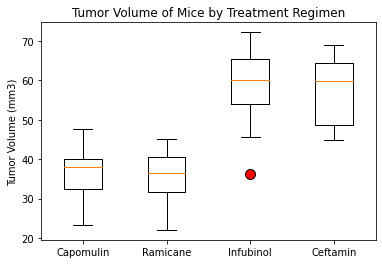

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumes1 = cap_df['Tumor Volume (mm3)']
volumes2 = ram_df['Tumor Volume (mm3)']
volumes3 = inf_df['Tumor Volume (mm3)']
volumes4 = cef_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice by Treatment Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(t)
ax1.boxplot((volumes1, volumes2, volumes3, volumes4), flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Vol of Mouse i557 Over Time')

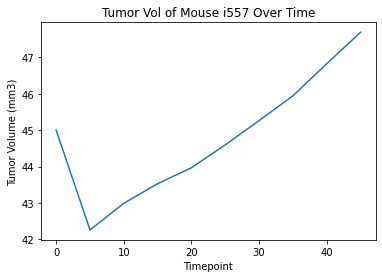

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_id = cleaned_df[cleaned_df['Mouse ID'] == 'i557']
plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Vol of Mouse i557 Over Time')

Text(0.5, 1.0, 'Avg Tumor Vol vs Weight for Mice Treated w/ Capomulin')

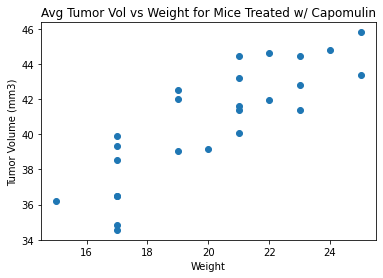

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
weight = weight_df.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor = weight_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(weight, avg_tumor)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Avg Tumor Vol vs Weight for Mice Treated w/ Capomulin')

## Correlation and Regression

The correlation between weight and average tumor volume is 0.84


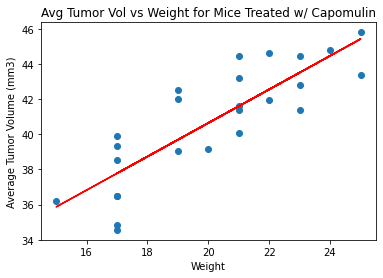

In [86]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

from scipy.stats import linregress
x_values = weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Avg Tumor Vol vs Weight for Mice Treated w/ Capomulin')
plt.show()